In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False
import matplotlib.patches as mpatches
from tqdm import tqdm

In [2]:
energy = pd.read_csv('C:/Users/user/github/Data/energy/train.csv', encoding='cp949')

In [3]:
solar = pd.read_csv('C:\\Users\\user\\github\\Data\\capstone\\weather/solar_power_2204.csv')

In [4]:
solar['datetime'] = pd.to_datetime(solar['datetime'])
solar.target.replace(65535.0, solar.target.mean(), inplace=True)
solar['month'] = solar.datetime.dt.month
solar['hour'] = solar.datetime.dt.hour
solar['year'] = solar.datetime.dt.year
solar['day'] = solar.datetime.dt.day

solar_eda = solar.groupby(['year','month','day','hour']).mean().reset_index()
solar_eda[['year','month','day','hour']] = solar_eda[['year','month','day','hour']].astype('str')
solar_eda['date'] = (solar_eda.year + '-' + solar_eda.month + '-' + solar_eda.day + ' ' + solar_eda.hour + ':00')
solar_eda.date = pd.to_datetime(solar_eda.date)

In [5]:
solar_eda = solar_eda.set_index('date')
solar_eda = solar_eda.fillna(0)

In [6]:
ee = solar.groupby(['hour']).mean().target

In [7]:
ee[:7] = 0

In [8]:
ee[20:] = 0

In [9]:
ee = ee * 2.5

In [10]:
winter_max = [9, 10, 11, 16, 17, 18]
winter_mid = [8, 12, 13, 14, 15, 19, 20, 21]
winter_min = [0, 1, 2, 3, 4, 5, 6, 7, 22, 23]

spring_max = [11, 13, 14, 15, 16, 17]
spring_mid = [9, 10, 12, 18, 19, 20, 21]
spring_min = [0, 1, 2, 3, 4, 5, 6, 7, 22, 23]

In [11]:
df = pd.read_csv('C:/Users/user/github/Data/energy/train.csv', encoding='cp949')

In [12]:
df.date_time = pd.to_datetime(df.date_time)

In [13]:
eda_df = df.copy()

eda_df['month'] = 0
eda_df['hour'] = 0
eda_df['year'] = 0
eda_df['day'] = 0
eda_df['요일'] = 0

In [14]:
days = {0: '월요일', 1: '화요일', 2: '수요일', 3: '목요일', 4: '금요일', 5: '토요일', 6: '일요일'}

In [15]:
eda_df['month'] = eda_df.date_time.dt.month
eda_df['hour'] = eda_df.date_time.dt.hour
eda_df['year'] = eda_df.date_time.dt.year
eda_df['day'] = eda_df.date_time.dt.day
eda_df['요일'] = eda_df['date_time'].dt.weekday.map(days)

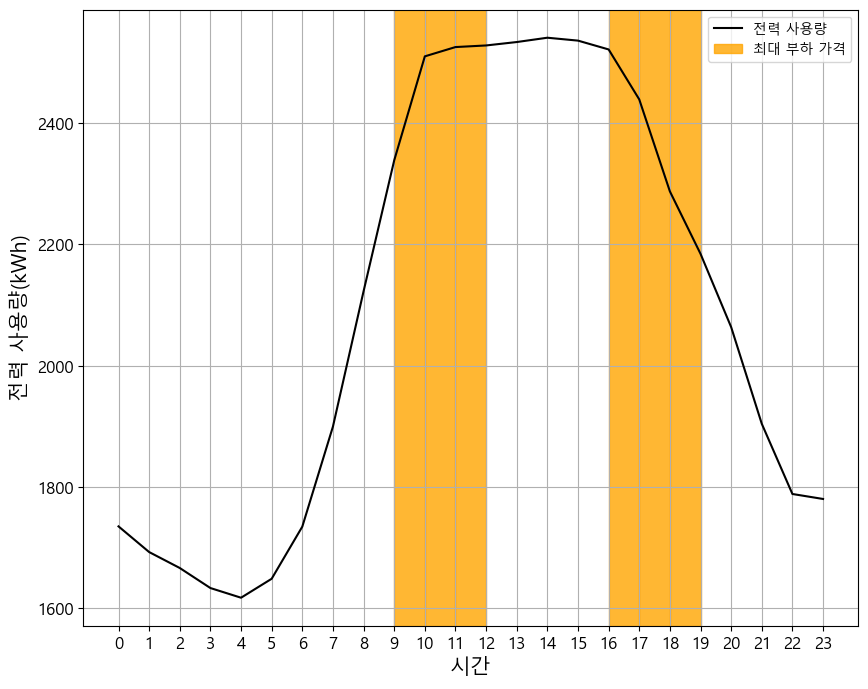

In [16]:
qq = eda_df[eda_df['태양광보유'] == 0].groupby(['hour']).mean()['전력사용량(kWh)']
plt.figure(figsize=(10,8))
plt.plot(qq, color = 'k', label = '전력 사용량')
plt.grid(True)
plt.yticks(fontsize = 12)
plt.xticks(np.arange(0,24,1) , fontsize = 12)
plt.xlabel('시간', fontsize = 15)
plt.ylabel('전력 사용량(kWh)', fontsize = 15)

for i in winter_max:
    if i == winter_max[-1]:
        plt.axvspan(i, i+1, alpha=0.8, color='orange', label = '최대 부하 가격')
    else:
        plt.axvspan(i, i+1, alpha=0.8, color='orange')
plt.legend()
plt.show()

In [17]:
time = [11, 13, 14, 15, 16, 17, 18, 19]

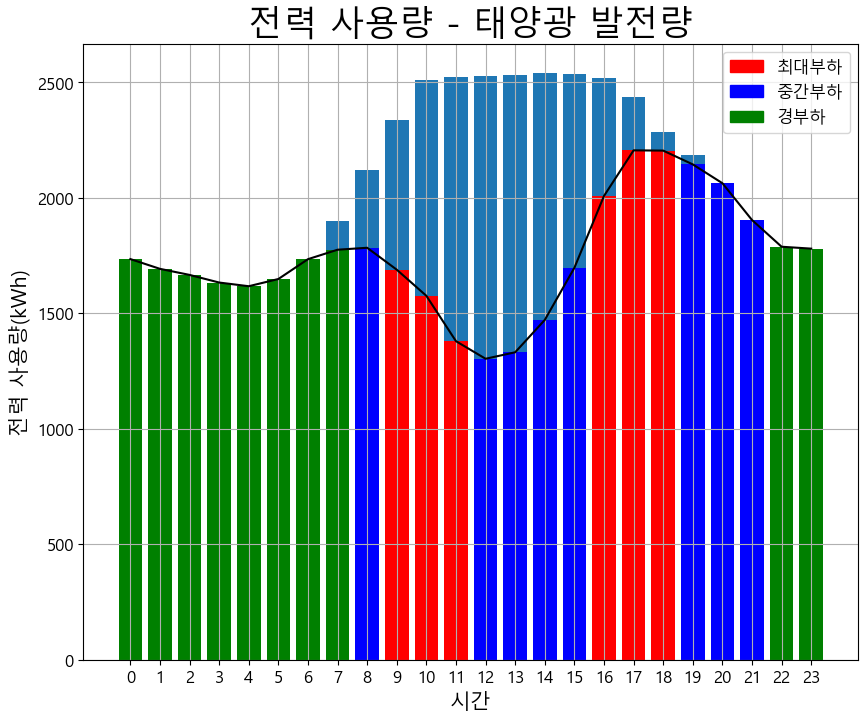

In [18]:
plt.figure(figsize=(10,8))

colors = ['grey'] * 24  # 기본 색상을 설정합니다.
# 겨울 색상 설정
for hour in winter_max:
    colors[hour] = 'red'
for hour in winter_mid:
    colors[hour] = 'blue'
for hour in winter_min:
    colors[hour] = 'green'

plt.plot(qq-ee, color = 'k', label = '실제 전력 사용량')
plt.bar(np.arange(0,24), qq)
plt.bar(np.arange(0,24), qq-ee, color = colors)
plt.grid(True)
plt.yticks(fontsize = 12)
plt.xticks(np.arange(0,24,1) , fontsize = 12)
plt.xlabel('시간', fontsize = 15)
plt.ylabel('전력 사용량(kWh)', fontsize = 15)
plt.title('전력 사용량 - 태양광 발전량', fontsize = 25)
legend_elements = [
    mpatches.Patch(color='red', label='최대부하'),
    mpatches.Patch(color='blue', label='중간부하'),
    mpatches.Patch(color='green', label='경부하')
]
plt.legend(handles=legend_elements, fontsize=12)
plt.show()

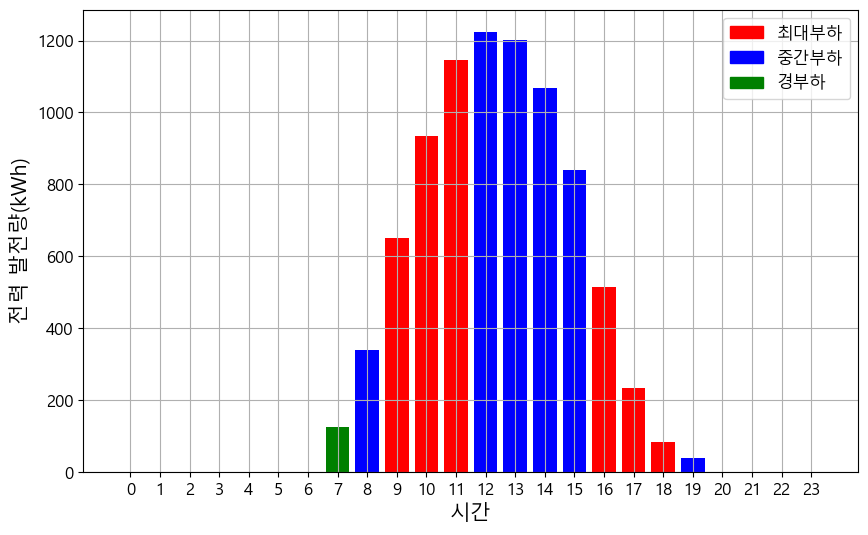

In [19]:
colors = ['grey'] * 24 
for hour in winter_max:
    colors[hour] = 'red'
for hour in winter_mid:
    colors[hour] = 'blue'
for hour in winter_min:
    colors[hour] = 'green'

# 막대 그래프 생성
plt.figure(figsize=(10, 6))
plt.bar(np.arange(24), ee, color=colors)
plt.grid(True)
plt.yticks(fontsize=12)
plt.xticks(np.arange(0, 24, 1), fontsize=12)
plt.xlabel('시간', fontsize=15)
plt.ylabel('전력 발전량(kWh)', fontsize=15)

# 범례 추가
legend_elements = [
    mpatches.Patch(color='red', label='최대부하'),
    mpatches.Patch(color='blue', label='중간부하'),
    mpatches.Patch(color='green', label='경부하')
]
plt.legend(handles=legend_elements, fontsize=12)

plt.show()


In [20]:
print(ee[winter_max].sum())
print(ee[winter_mid].sum())
print(ee[winter_min].sum())

3557.972338582804
4712.8016994812415
124.03086264656616


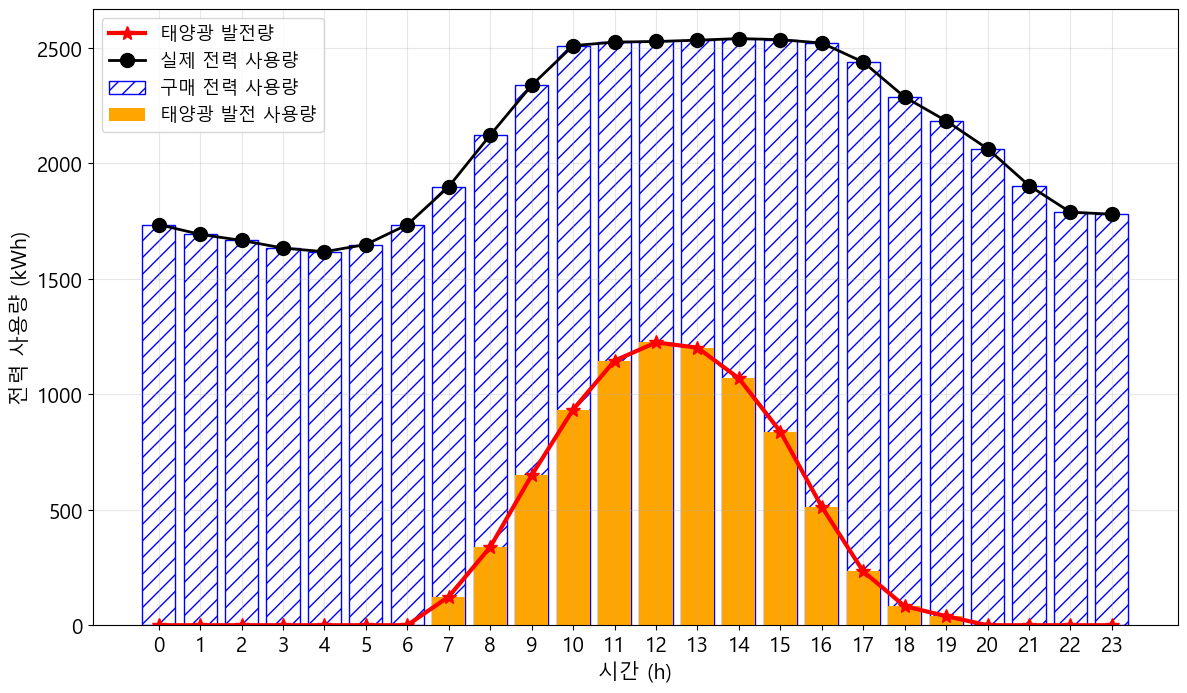

In [37]:
hours = np.arange(24)
plt.figure(figsize=(14, 8))

bar1 = plt.bar(hours, qq, edgecolor='blue', hatch='//', color='white', label='구매 전력 사용량')  # 전체 전력 사용량 막대
bar2 = plt.bar(hours, ee,  color = 'orange',label='태양광 발전 사용량')  
line = plt.plot(ee, linewidth = 3, color = 'r', marker = '*',markersize = 10, label = '태양광 발전량')
line2 = plt.plot(qq, linewidth = 2, color = 'k', marker = 'o', markersize = 10, label = '실제 전력 사용량')


plt.legend(fontsize = 13)
plt.xlabel('시간 (h)', fontsize = 15)
plt.ylabel('전력 사용량 (kWh)', fontsize = 15)
plt.xticks(hours, fontsize = 15)
plt.yticks(fontsize = 15)
plt.grid(alpha = 0.3)

plt.show()


In [22]:
ee[winter_max].sum()

3557.972338582804

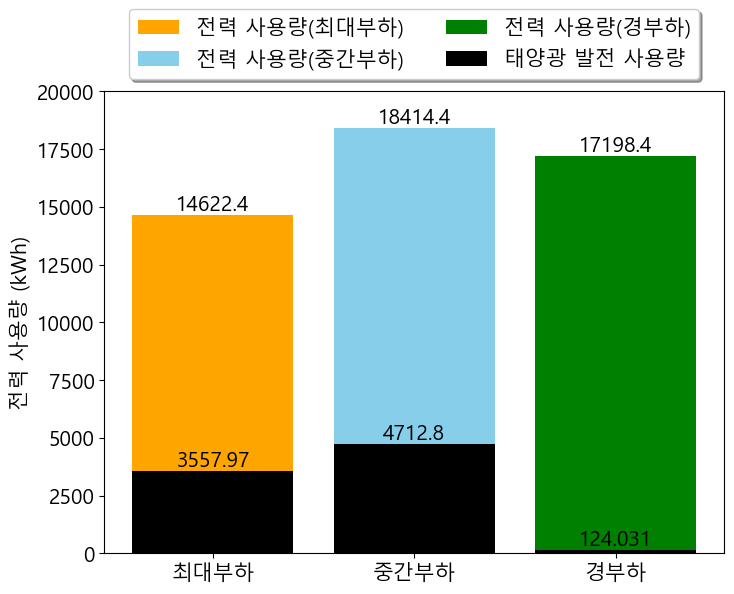

In [79]:
fontsize = 15
plt.figure(figsize=(8,6))
abc = plt.bar('최대부하', qq[winter_max].sum(), color = 'orange', label = '전력 사용량(최대부하)')
abcd = plt.bar('최대부하', ee[winter_max].sum(), color = 'k')
plt.bar_label(abc, fontsize = fontsize)
plt.bar_label(abcd, fontsize = fontsize)

abc_1 = plt.bar('중간부하', qq[winter_mid].sum(), color = 'skyblue', label = '전력 사용량(중간부하)')
abcd_1 = plt.bar('중간부하', ee[winter_mid].sum(), color = 'k')
plt.bar_label(abc_1, fontsize = fontsize)
plt.bar_label(abcd_1, fontsize = fontsize)

abc_2 = plt.bar('경부하', qq[winter_min].sum(), color = 'g', label = '전력 사용량(경부하)')
abcd_2 = plt.bar('경부하', ee[winter_min].sum(), color = 'k', label = '태양광 발전 사용량')
plt.bar_label(abc_2, fontsize = fontsize)
plt.bar_label(abcd_2, fontsize = fontsize)

plt.ylim(0,20000)
plt.ylabel('전력 사용량 (kWh)', fontsize = fontsize)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20), fancybox=True, shadow=True, ncol=2, fontsize = 15)
plt.xticks(fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.show()

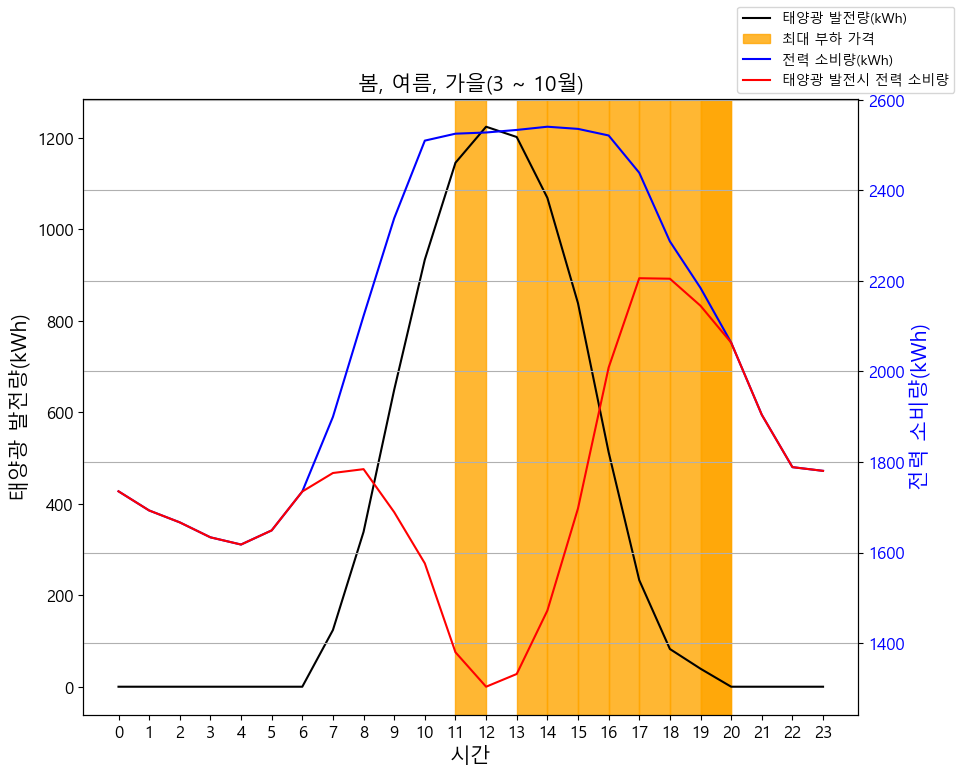

In [24]:
fig, ax1 = plt.subplots(figsize=(10, 8))

ax1.set_xlabel('시간', fontsize=15)
ax1.set_ylabel('태양광 발전량(kWh)', color='k', fontsize=15)
ax1.plot(ee, color='k', label='태양광 발전량(kWh)')
ax1.tick_params(axis='y', labelcolor='k', labelsize=12)
ax1.set_xticks(np.arange(0, 24, 1))
ax1.set_xticklabels(np.arange(0, 24, 1), fontsize=12)
ax1.set_title('봄, 여름, 가을(3 ~ 10월)', fontsize=15)

ax2 = ax1.twinx()

ax2.set_ylabel('전력 소비량(kWh)', color='b', fontsize=15)
ax2.plot(qq, color='b', label='전력 소비량(kWh)')
ax2.tick_params(axis='y', labelcolor='b', labelsize=12)

plt.plot(qq-ee, color='r', label='태양광 발전시 전력 소비량')


for i in time:
    ax1.axvspan(i, i+1, alpha=0.8, color='orange')
    if i == time[-1]:
        ax1.axvspan(i, i+1, alpha=0.8, color='orange', label = '최대 부하 가격')

plt.grid(True)
fig.legend()
plt.show()

In [25]:
time2 = [9, 10, 11, 16, 17, 18, 19]

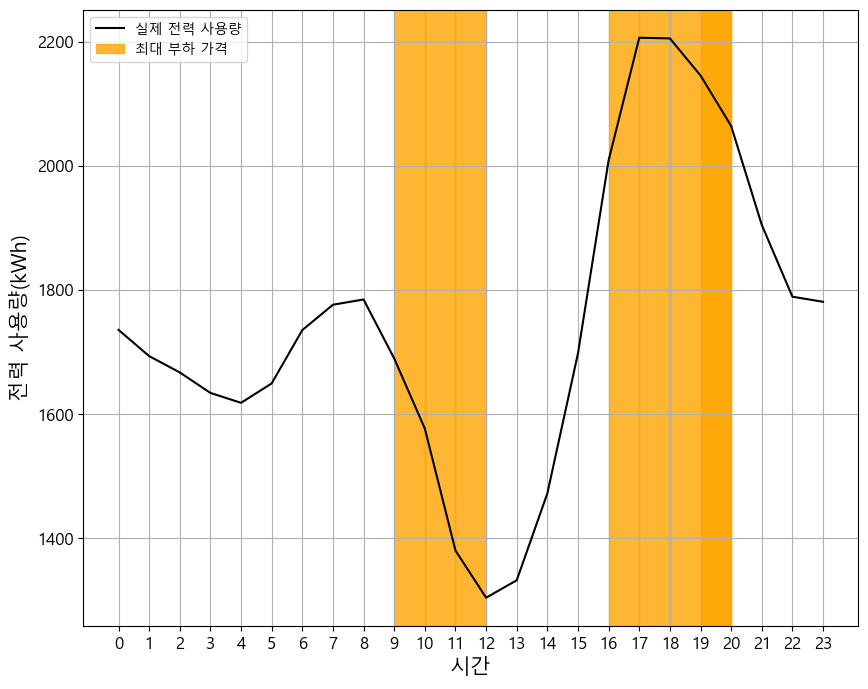

In [26]:
plt.figure(figsize=(10,8))
plt.plot(qq-ee, color = 'k', label = '실제 전력 사용량')
plt.grid(True)
plt.yticks(fontsize = 12)
plt.xticks(np.arange(0,24,1) , fontsize = 12)
plt.xlabel('시간', fontsize = 15)
plt.ylabel('전력 사용량(kWh)', fontsize = 15)
for i in time2:
    plt.axvspan(i, i+1, alpha=0.8, color='orange')
    if i == time2[-1]:
        plt.axvspan(i, i+1, alpha=0.8, color='orange', label = '최대 부하 가격')
plt.legend()
plt.show()

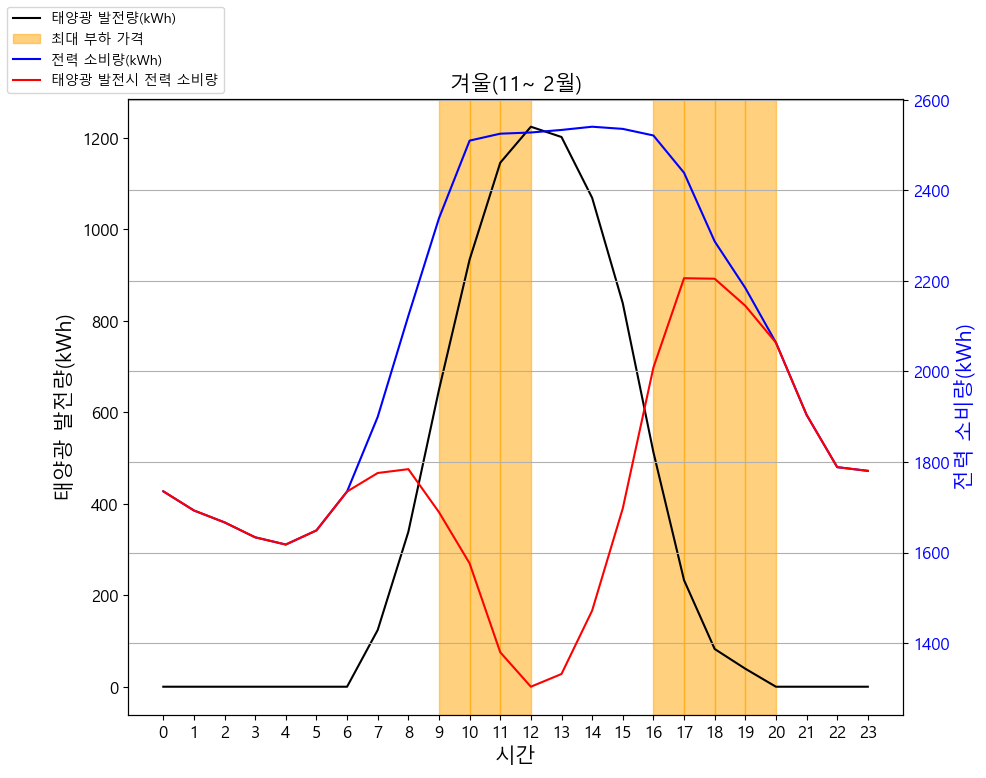

In [27]:
fig, ax1 = plt.subplots(figsize=(10, 8))

ax1.set_xlabel('시간', fontsize=15)
ax1.set_ylabel('태양광 발전량(kWh)', color='k', fontsize=15)
ax1.plot(ee, color='k', label='태양광 발전량(kWh)')
ax1.tick_params(axis='y', labelcolor='k', labelsize=12)
ax1.set_xticks(np.arange(0, 24, 1))
ax1.set_xticklabels(np.arange(0, 24, 1), fontsize=12)
ax1.set_title('겨울(11~ 2월)', fontsize=15)

ax2 = ax1.twinx()

ax2.set_ylabel('전력 소비량(kWh)', color='b', fontsize=15)
ax2.plot(qq, color='b', label='전력 소비량(kWh)')
ax2.tick_params(axis='y', labelcolor='b', labelsize=12)

plt.plot(qq-ee, color='r', label='태양광 발전시 전력 소비량')

for i in time2:
    if i == time2[-1]:
        ax1.axvspan(i, i+1, alpha=0.5, color='orange', label='최대 부하 가격')
    else:
        ax1.axvspan(i, i+1, alpha=0.5, color='orange')


fig.legend(loc='upper left')
plt.grid(True)
plt.show()


In [28]:
sell = {
    '시간' : ['경부하', '중간부하', '최대부하'],
    '여름철' : ['84.8', '137.7', '219.8'],
    '봄 가을철' : ['84.8','107.3','138.0'],
    '겨울철' : ['91.8', '137.9', '195.4']
}

In [29]:
sell = pd.DataFrame(sell)

In [30]:
sell

,시간,여름철,봄 가을철,겨울철
0,경부하,84.8,84.8,91.8
1,중간부하,137.7,107.3,137.9
2,최대부하,219.8,138.0,195.4


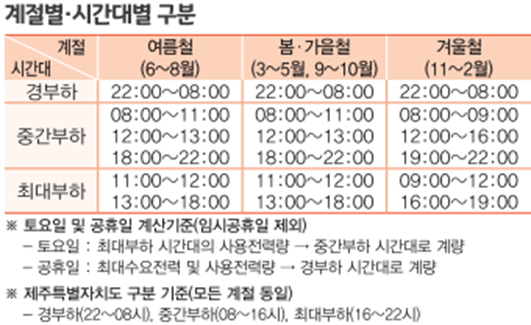

In [31]:
winter_max = [9, 10, 11, 16, 17, 18]
winter_mid = [8, 12, 13, 14, 15, 19, 20, 21]
winter_min = [0, 1, 2, 3, 4, 5, 6, 7, 22, 23]

spring_max = [11, 13, 14, 15, 16, 17]
spring_mid = [9, 10, 12, 18, 19, 20, 21]
spring_min = [0, 1, 2, 3, 4, 5, 6, 7, 22, 23]

In [32]:
summer_price = [84.8, 84.8, 84.8, 84.8, 84.8,
                84.8, 84.8, 84.8, 137.7, 137.7,
                137.7, 219.8, 137.7, 219.8, 219.8,
                219.8, 219.8, 219.8, 219.8, 137.7,
                137.7, 137.7, 84.8, 84.8]

In [33]:
normal_price = [84.8, 84.8, 84.8, 84.8, 84.8,
                84.8, 84.8, 84.8, 107.3, 107.3,
                107.3, 138, 107.3, 138, 138,
                138, 138, 138, 138, 107.3,
                107.3, 107.3, 84.8, 84.8]

In [34]:
winter_price = [91.8, 91.8, 91.8, 91.8, 91.8, 
                91.8, 91.8, 91.8, 137.9, 195.4,
                195.4, 195.4, 137.9, 137.9, 137.9,
                137.9, 195.4, 195.4, 195.4, 195.4,
                137.9, 137.9, 91.8, 91.8]

In [39]:
import pvlib

In [40]:
longitude = 128.5647
latitude = 38.2509

In [41]:
location = pvlib.location.Location(latitude, longitude, tz='Asia/Seoul')

# 일일 일사량을 구합니다.
times = pd.date_range(start='2019-09-05', 
                      end = pd.Timestamp('2019-09-05') + pd.Timedelta(days=1) - pd.Timedelta(hours=1), 
                      freq='1H', tz='Asia/Seoul')
solpos = location.get_solarposition(times=times)
dni_extra = pvlib.irradiance.get_extra_radiation(times)
airmass = pvlib.atmosphere.get_relative_airmass(solpos['apparent_zenith'])
pressure = pvlib.atmosphere.alt2pres(location.altitude)
am_abs = pvlib.atmosphere.get_absolute_airmass(airmass, pressure) 
tl = pvlib.clearsky.lookup_linke_turbidity(times, latitude, longitude)

# Simplified Solis model을 적용하여 clear sky GHI, DNI, DHI를 얻습니다.
solis_clearsky = pvlib.clearsky.simplified_solis(solpos['apparent_zenith'], am_abs, tl)
cs = location.get_clearsky(times, model='simplified_solis')

# 발전량을 계산합니다.
system = pvlib.pvsystem.PVSystem(surface_tilt=30, surface_azimuth=180,
                                 module_parameters={'pdc0': 7000, 'gamma_pdc': -0.004}, 
                                 inverter_parameters={'pdc0': 7000},
                                 modules_per_string=1, strings_per_inverter=1,
                                 temperature_model_parameters={'a': -3.56, 'b': -0.075, 'deltaT': 3})
mc = pvlib.modelchain.ModelChain(system, location, spectral_model='no_loss', aoi_model='no_loss')

mc.run_model(solis_clearsky)

mc.results.ac

2019-09-05 00:00:00+09:00       0.000000
2019-09-05 01:00:00+09:00       0.000000
2019-09-05 02:00:00+09:00       0.000000
2019-09-05 03:00:00+09:00       0.000000
2019-09-05 04:00:00+09:00       0.000000
2019-09-05 05:00:00+09:00       0.000000
2019-09-05 06:00:00+09:00       0.000000
2019-09-05 07:00:00+09:00       0.000000
2019-09-05 08:00:00+09:00     334.297326
2019-09-05 09:00:00+09:00     931.366851
2019-09-05 10:00:00+09:00    1385.114286
2019-09-05 11:00:00+09:00    1586.743072
2019-09-05 12:00:00+09:00    1623.649335
2019-09-05 13:00:00+09:00    1622.876036
2019-09-05 14:00:00+09:00    1567.068971
2019-09-05 15:00:00+09:00    1321.960197
2019-09-05 16:00:00+09:00     825.803260
2019-09-05 17:00:00+09:00     235.668883
2019-09-05 18:00:00+09:00       0.000000
2019-09-05 19:00:00+09:00       0.000000
2019-09-05 20:00:00+09:00       0.000000
2019-09-05 21:00:00+09:00       0.000000
2019-09-05 22:00:00+09:00       0.000000
2019-09-05 23:00:00+09:00       0.000000
Freq: H, Name: p

In [46]:
df_results = pd.read_csv('../optimal/paper_table_6.csv')

In [43]:
input = eda_df.drop(['기온(°C)','풍속(m/s)','습도(%)','강수량(mm)','일조(hr)','비전기냉방설비운영','태양광보유','month'], axis=1)

In [50]:
bar2

<BarContainer object of 24 artists>

In [62]:
import ast

In [64]:
df_results['BestPosition'] = df_results['BestPosition'].apply(ast.literal_eval)

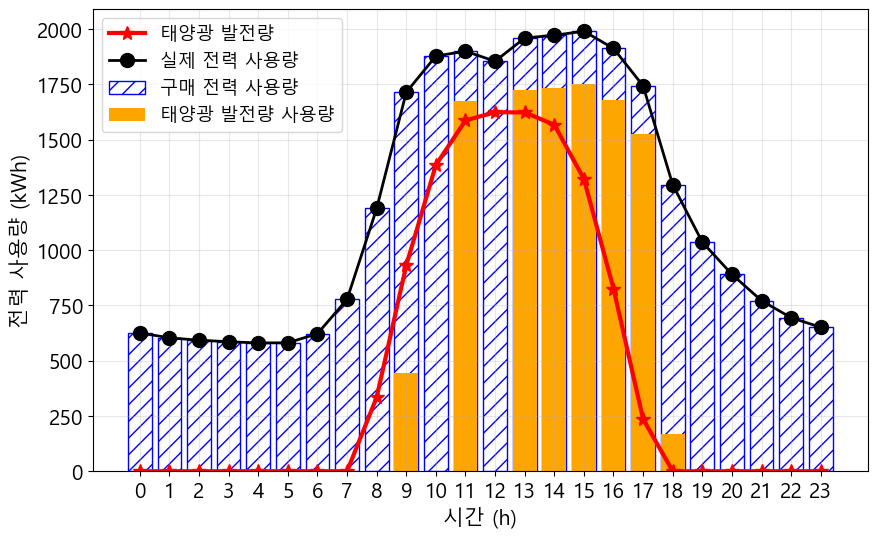

In [66]:
hours = np.arange(24)
total_power = input[input['num']==6].groupby(['hour']).mean()['전력사용량(kWh)'].values
solar_power = mc.results.ac.values
purchase_power = total_power - solar_power

plt.figure(figsize=(10, 6))
bar1 = plt.bar(hours, total_power, edgecolor='blue', hatch='//', color='white', label='구매 전력 사용량')  # 전체 전력 사용량 막대
bar2 = plt.bar(hours, df_results.loc[53]['BestPosition'],  color = 'orange',label='태양광 발전량 사용량')  
line = plt.plot(solar_power, linewidth = 3, color = 'r', marker = '*',markersize = 10, label = '태양광 발전량')
line2 = plt.plot(total_power, linewidth = 2, color = 'k', marker = 'o', markersize = 10, label = '실제 전력 사용량')

plt.legend(fontsize = 13)
plt.xlabel('시간 (h)', fontsize = 15)
plt.ylabel('전력 사용량 (kWh)', fontsize = 15)
plt.xticks(hours, fontsize = 15)
plt.yticks(fontsize = 15)
plt.grid(alpha = 0.3)

plt.show()


In [73]:
winter_min

[0, 1, 2, 3, 4, 5, 6, 7, 22, 23]

In [74]:
np.array(df_results.loc[53]['BestPosition'])[winter_min]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [89]:
spring_mid

[8, 12, 13, 14, 15, 19, 20, 21]

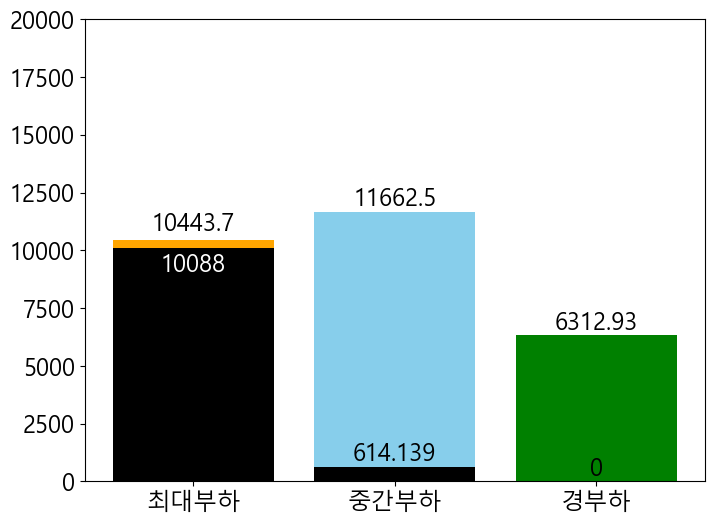

In [116]:
fontsize = 17
plt.figure(figsize=(8,6))
abc = plt.bar('최대부하', total_power[winter_max].sum(), color = 'orange', label = '전력 사용량(최대부하)')
abcd = plt.bar('최대부하', np.array(df_results.loc[53]['BestPosition'])[spring_max].sum(), color = 'k')
plt.bar_label(abc, padding= 2, fontsize = fontsize)
plt.bar_label(abcd, padding=-21, fontsize = fontsize, color = 'w')

abc_1 = plt.bar('중간부하', total_power[winter_mid].sum(), color = 'skyblue', label = '전력 사용량(중간부하)')
abcd_1 = plt.bar('중간부하', np.array(df_results.loc[53]['BestPosition'])[spring_mid].sum(), color = 'k')
plt.bar_label(abc_1, fontsize = fontsize)
plt.bar_label(abcd_1, fontsize = fontsize)

abc_2 = plt.bar('경부하', total_power[winter_min].sum(), color = 'g', label = '전력 사용량(경부하)')
abcd_2 = plt.bar('경부하', np.array(df_results.loc[53]['BestPosition'])[spring_min].sum(), color = 'k', label = '태양광 발전 사용량')
plt.bar_label(abc_2, fontsize = fontsize)
plt.bar_label(abcd_2, fontsize = fontsize)

plt.ylim(0,20000)
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20), fancybox=True, shadow=True, ncol=2, fontsize = 15)
plt.xticks(fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.show()

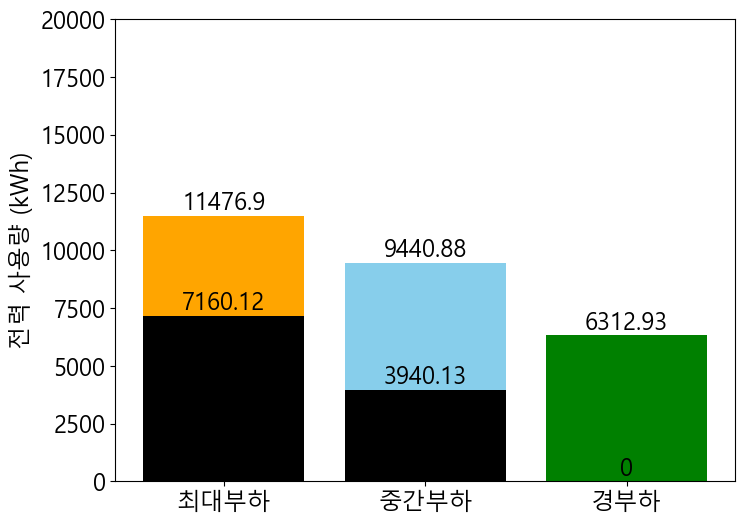

In [117]:
fontsize = 17
plt.figure(figsize=(8,6))
abc = plt.bar('최대부하', total_power[spring_max].sum(), color = 'orange', label = '전력 사용량(최대부하)')
abcd = plt.bar('최대부하', solar_power[spring_max].sum(), color = 'k')
plt.bar_label(abc, fontsize = fontsize)
plt.bar_label(abcd, fontsize = fontsize)

abc_1 = plt.bar('중간부하', total_power[spring_mid].sum(), color = 'skyblue', label = '전력 사용량(중간부하)')
abcd_1 = plt.bar('중간부하', solar_power[spring_mid].sum(), color = 'k')
plt.bar_label(abc_1, fontsize = fontsize)
plt.bar_label(abcd_1, fontsize = fontsize)

abc_2 = plt.bar('경부하', total_power[spring_min].sum(), color = 'g', label = '전력 사용량(경부하)')
abcd_2 = plt.bar('경부하', solar_power[spring_min].sum(), color = 'k', label = '태양광 발전 사용량')
plt.bar_label(abc_2, fontsize = fontsize)
plt.bar_label(abcd_2, fontsize = fontsize)

plt.ylim(0,20000)
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20), fancybox=True, shadow=True, ncol=2, fontsize = 15)
plt.xticks(fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.ylabel('전력 사용량 (kWh)', fontsize = fontsize)
plt.show()